In [1]:
#Dependencies

import pandas_datareader.data as web
 
import pandas as pd
 
import numpy as np
 
import datetime as dt
 
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series, DataFrame

import locale
locale.setlocale(locale.LC_ALL,'')





'English_United States.1252'

In [2]:
#Get data from yahoo for SPY (S&P500)
SPY = web.get_data_yahoo('SPY', start=dt.datetime(1995, 1, 1), end=dt.datetime(2019, 12, 1))
SPY = SPY.drop(["High", "Low", "Open","Volume", "Adj Close"], axis=1)
SPY = SPY.resample('1M').mean()
SPY = SPY.rename(columns={'Close': 'SPY_Close'})

SPY = SPY.reset_index()


SPY.head(10)



,Date,SPY_Close
0,1995-01-31,46.561756
1,1995-02-28,48.384046
2,1995-03-31,49.451766
3,1995-04-30,50.890625
4,1995-05-31,52.579545
5,1995-06-30,54.066761
6,1995-07-31,55.805469
7,1995-08-31,56.085598
8,1995-09-30,58.044531
9,1995-10-31,58.404830


In [3]:
#Get data from yahoo for VBMFX (Total Bond)

VBMFX = web.get_data_yahoo('VBMFX', start=dt.datetime(1995, 1, 1), end=dt.datetime(2019, 12, 1))
VBMFX = VBMFX.drop(["High", "Low", "Open","Volume", "Adj Close"], axis=1)
VBMFX = VBMFX.resample('1M').mean()

VBMFX = VBMFX.rename(columns={'Close': 'VBMFX_Close'})
VBMFX = VBMFX.reset_index()



VBMFX.head(10)

,Date,VBMFX_Close
0,1995-01-31,9.200476
1,1995-02-28,9.342105
2,1995-03-31,9.450000
3,1995-04-30,9.518947
4,1995-05-31,9.703636
5,1995-06-30,9.876364
6,1995-07-31,9.835500
7,1995-08-31,9.749130
8,1995-09-30,9.863000
9,1995-10-31,9.933182


In [4]:
#Merge S&P500 and Total Bond data on one dataframe
#Set Date as an index
data = pd.merge(SPY,VBMFX, on = 'Date', how ='left')
data = data.set_index('Date')
data


,SPY_Close,VBMFX_Close
Date,,
1995-01-31,46.561756,9.200476
1995-02-28,48.384046,9.342105
1995-03-31,49.451766,9.450000
1995-04-30,50.890625,9.518947
1995-05-31,52.579545,9.703636
...,...,...
2019-08-31,289.599089,11.135909
2019-09-30,298.100999,11.098000
2019-10-31,297.120868,11.104348


In [5]:
#Update the format to show values to 3 decimal places


#Calculate rolling 12 month returns for SPY and VBMFX

data_12M_Return = data.pct_change(12)

#Drop #NAs
data_12M_Return= data_12M_Return.dropna() 

#Rename columns to SPY_Return and VBMFX_Returns

data_12M_Return = data_12M_Return.rename(columns={'SPY_Close': 'SPY_Return','VBMFX_Close': 'VBMFX_Return' })

#Calculate 12-month rolling returns for 4 new portfolios

#The weight for the portfolios are:
    #Very Aggressive: 100% Stock (SPY)
    #Aggeressive: 80% SPY and 20% Bonds (VBMFX)
    #Moderate: 50% SPY and 50% VBMFX
    #Conservative: 20% SPY and 80% VBMFX
    
data_12M_Return['VeryAggressive'] = data_12M_Return.SPY_Return
#data_12M_Return['90/10'] =  .9*data_12M_Return.SPY_Return + .1* data_12M_Return.VBMFX_Return

data_12M_Return['Aggressive'] = .8*data_12M_Return.SPY_Return + .2* data_12M_Return.VBMFX_Return
#data_12M_Return['70/30'] =  .7*data_12M_Return.SPY_Return + .3* data_12M_Return.VBMFX_Return
#data_12M_Return['60/40'] =  .6*data_12M_Return.SPY_Return + .4* data_12M_Return.VBMFX_Return
data_12M_Return['Moderate'] = .5*data_12M_Return.SPY_Return + .5* data_12M_Return.VBMFX_Return
#data_12M_Return['40/60'] =  .4*data_12M_Return.SPY_Return + .6* data_12M_Return.VBMFX_Return
#data_12M_Return['30/70'] =  .3*data_12M_Return.SPY_Return + .7* data_12M_Return.VBMFX_Return

data_12M_Return['Conservative'] = .2*data_12M_Return.SPY_Return + .8* data_12M_Return.VBMFX_Return
#data_12M_Return['10/90'] =  .1*data_12M_Return.SPY_Return + .9* data_12M_Return.VBMFX_Return

data_12M_Return['Very Conservative'] =  data_12M_Return.VBMFX_Return

data_12M_Return







,SPY_Return,VBMFX_Return,VeryAggressive,Aggressive,Moderate,Conservative,Very Conservative
Date,,,,,,,
1996-01-31,0.320201,0.099301,0.320201,0.276021,0.209751,0.143481,0.099301
1996-02-29,0.344629,0.077113,0.344629,0.291126,0.210871,0.130616,0.077113
1996-03-31,0.311373,0.041320,0.311373,0.257362,0.176347,0.095331,0.041320
1996-04-30,0.271591,0.022072,0.271591,0.221687,0.146831,0.071976,0.022072
1996-05-31,0.261657,-0.004216,0.261657,0.208483,0.128721,0.048959,-0.004216
...,...,...,...,...,...,...,...
2019-08-31,0.013674,0.066747,0.013674,0.024288,0.040210,0.056132,0.066747
2019-09-30,0.027435,0.069660,0.027435,0.035880,0.048547,0.061215,0.069660
2019-10-31,0.068877,0.079870,0.068877,0.071076,0.074373,0.077671,0.079870


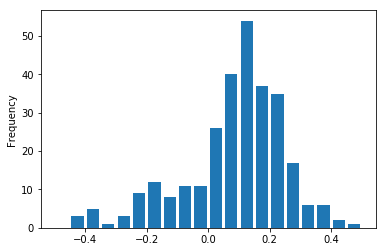

In [6]:
#Create histogram of the returns for each portfolio with 20 bins.

data_12M_Return['VeryAggressive'].plot(kind='hist',bins=20,rwidth=.8,range=[-.5, .5])

plt.show()

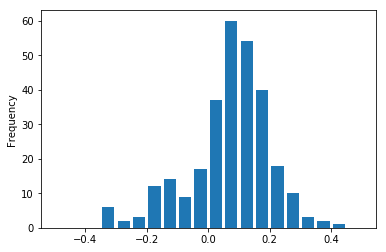

In [7]:
data_12M_Return['Aggressive'].plot(kind='hist',bins=20,rwidth=0.8,range=[-.5, .5])
plt.show()

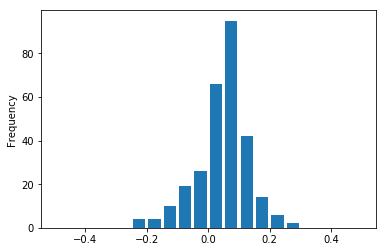

In [8]:
data_12M_Return['Moderate'].plot(kind='hist',bins=20,rwidth=0.8,range=[-.5, .5])
plt.show()

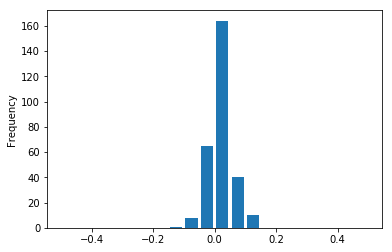

In [9]:
data_12M_Return['Conservative'].plot(kind='hist',bins=20,rwidth=0.8,range=[-.5, .5])
plt.show()

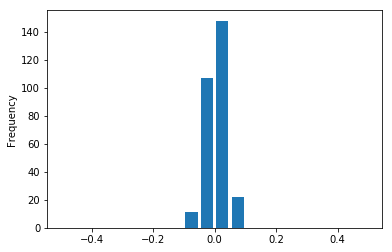

In [10]:
data_12M_Return['Very Conservative'].plot(kind='hist',bins=20,rwidth=0.8,range=[-.5, .5])
plt.show()

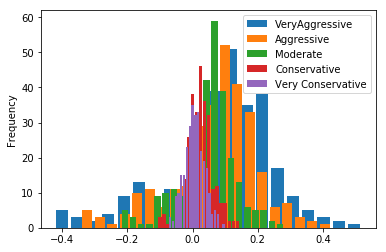

In [11]:
#Plot all 4 portfolios's returns to show the difference in varaince.

data_12M_Return['VeryAggressive'].plot(kind='hist',bins=20,rwidth=.8)
data_12M_Return['Aggressive'].plot(kind='hist',bins=20,rwidth=0.8)
data_12M_Return['Moderate'].plot(kind='hist',bins=20,rwidth=0.8)
data_12M_Return['Conservative'].plot(kind='hist',bins=20,rwidth=0.8)
data_12M_Return['Very Conservative'].plot(kind='hist',bins=20,rwidth=0.8)


plt.legend()
plt.show()

In [12]:
#Calculate summary statistics for the 4 portfolios. 
# We will need the mean and std.deviation for our model calculations.

data_12M_Return.describe()

,SPY_Return,VBMFX_Return,VeryAggressive,Aggressive,Moderate,Conservative,Very Conservative
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.086729,0.005086,0.086729,0.070401,0.045908,0.021415,0.005086
std,0.165777,0.030841,0.165777,0.132279,0.083109,0.039740,0.030841
min,-0.423889,-0.073500,-0.423889,-0.342556,-0.220557,-0.106590,-0.073500
25%,0.025232,-0.015181,0.025232,0.023969,0.013459,-0.000412,-0.015181
50%,0.115621,0.004950,0.115621,0.092698,0.057916,0.021523,0.004950
75%,0.192387,0.023995,0.192387,0.151217,0.095030,0.044834,0.023995
max,0.519682,0.099301,0.519682,0.424201,0.280980,0.143481,0.099301


In [13]:
#This is calculating the ending portfolio value based on the initial investment, additions
#time horizon, expected rate of returns.
# We will not be using this as the market returns are never uniform.

pv = 10000
time_horizon = 30
i = 0.0867
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(locale.currency(ending, grouping=True))
    pv = ending

$20,867.00
$32,676.17
$45,509.19
$59,454.84
$74,609.57
$91,078.22
$108,974.71
$128,422.81
$149,557.07
$172,523.67
$197,481.47
$224,603.12
$254,076.21
$286,104.61
$320,909.88
$358,732.77
$399,834.90
$444,500.59
$493,038.79
$545,785.25
$603,104.83
$665,394.02
$733,083.68
$806,642.04
$886,577.90
$973,444.21
$1,067,841.82
$1,170,423.70
$1,281,899.44
$1,403,040.12


In [14]:
#This is calculating the ending portfolio value based on the initial investment, additions
#time horizon, expected rate of returns and standard deviation.
# The returns shown below are more likley to happen but we will run multiple simulations.

pv = 10000
expected_return = .0867
volatility = .17
time_horizon =30
annual_addition = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(locale.currency(fv, grouping=True)))
    pv = fv


	Return     		Ending Value
	0.2651               	$22,651.06
	-0.6021               	$19,012.21
	0.0148               	$29,293.28
	-0.0298               	$38,419.40
	-0.0938               	$44,815.00
	0.3994               	$72,712.49
	0.1516               	$93,733.06
	0.1262               	$115,561.82
	0.2317               	$152,332.94
	-0.0049               	$161,582.93
	-0.1471               	$147,811.38
	0.0701               	$168,173.41
	0.126               	$199,361.34
	-0.0297               	$203,434.21
	0.1474               	$243,414.91
	-0.0366               	$244,515.10
	0.0849               	$275,266.52
	0.1509               	$326,792.72
	0.2286               	$411,487.99
	-0.0206               	$413,025.80
	0.1849               	$499,384.34
	0.2702               	$644,329.99
	-0.025               	$638,208.54
	-0.339               	$431,857.21
	-0.1898               	$359,895.07
	-0.0407               	$355,254.25
	0.2389               	$450,108.83
	0.2701               	$58

In [15]:
#Create a new dataframe to hold simulation results.
# We will run 100 simulations.

#PV, annual_investment and time_horizon will be grabbed from the user input.
# Expected_return and volatility will be grabbed from the portfolio selected.


sim = DataFrame()
iterations = 100


for x in range(iterations):
    expected_return = .0867 #Value based on selection
    volatility = .17 #Value based on selection
    time_horizon = 30 #Input Value
    pv = 10000 #Input Value
    annual_investment = 10000 #Input Value
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        
        stream.append(end)

        pv = end

    
    sim[x] = stream

In [16]:
first_ten = list(range(10))
sim[first_ten]

,0,1,2,3,4,5,6,7,8,9
0,19601.03,21821.39,20122.22,21286.36,23896.67,18327.04,22931.13,20577.64,20202.86,22950.28
1,34289.75,39041.61,33790.14,29001.40,35685.16,32314.90,28113.88,34608.82,27223.81,39888.59
2,48822.98,31185.24,46925.21,54737.78,46209.76,47185.90,39420.45,36754.37,33193.89,50769.40
3,57208.85,33833.96,57405.64,64531.14,57158.67,71486.92,60103.70,45698.68,43769.51,88658.65
4,64014.02,53728.06,84145.82,89510.61,68410.52,104396.83,68337.79,55725.99,67468.79,121290.37
5,72323.50,60182.13,102961.95,107118.47,75432.86,116393.23,77348.88,80823.69,85452.61,167518.98
6,85450.52,62180.10,136563.50,151144.44,94893.27,108185.89,91841.00,87670.77,96247.18,169545.37
7,85502.09,87454.67,171797.23,174630.96,116026.48,124082.64,92000.55,101734.96,70226.71,161184.71
8,99277.81,111851.27,196074.62,194747.38,145115.02,144459.12,90648.76,112276.52,76851.06,183258.74
9,114799.55,114309.11,252246.19,236090.90,182567.06,152058.07,107721.80,139273.40,72724.45,177654.95


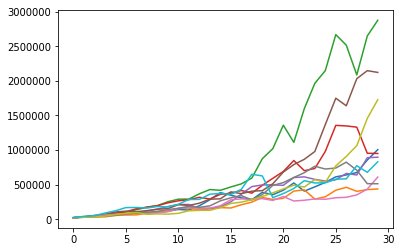

In [17]:
plt.plot(sim[first_ten])
plt.show()


In [18]:
#Sim index values is Input Years -1

ending_values = sim.loc[29]
# ending_values.describe()

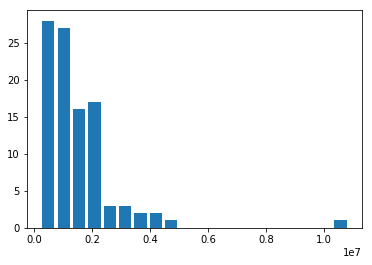

In [19]:
plt.hist(ending_values, bins=20,rwidth=0.8)
plt.show()

In [20]:
p_tiles = np.percentile(ending_values,[5,10,15,20,25,50, 75,80,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,20,25,50, 75,80, 85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(locale.currency(p_tiles[p], grouping=True)))

       5%-ile:  $375,145.72
      10%-ile:  $470,095.02
      15%-ile:  $515,959.90
      20%-ile:  $606,870.72
      25%-ile:  $709,242.15
      50%-ile:  $1,165,865.65
      75%-ile:  $1,939,067.11
      80%-ile:  $2,038,499.85
      85%-ile:  $2,236,607.21
      90%-ile:  $2,585,007.17
      95%-ile:  $3,749,254.58


In [22]:
prob_of_success = len(ending_values[ending_values>4000000]) / len(ending_values)
prob_of_success

0.04